In [2]:
from dataset import MosquitoDataset
from model import build_model
from train import train

import torch
from torch.utils.data import DataLoader
import os

from utils import plot_predictions, get_metrics, plot_losses

# Augmented Dataset

In [18]:
datafolder = "aug_dataset"
batch_size = 4
images_dir = f"../datasets/{datafolder}/images"
labels_dir = f"../datasets/{datafolder}/labels"

train_dataset = MosquitoDataset(f"{images_dir}/train", f"{labels_dir}/train")
val_dataset = MosquitoDataset(f"{images_dir}/val", f"{labels_dir}/val")
test_dataset = MosquitoDataset(f"{images_dir}/test", f"{labels_dir}/test")


trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

In [16]:
model = build_model(num_classes=7)  # 6 classes + 1 background
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [4]:
N_epochs = 5
save_dir = f"models/{datafolder}/"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_losses, val_losses, lr_history =  train(
    model=model,
    optimizer=optimizer,
    scheduler=scheduler,
    trainloader=trainloader,
    valloader=valloader,
    device=device,
    N_epochs=N_epochs,
    save_dir=save_dir,
    save_name="best_model.pth"
)

100%|██████████| 1652/1652 [16:04<00:00,  1.71it/s]


Epoch [1/5] | Train Loss: 0.1827 | Val Loss: 0.1570 | Time: 18 min 17 s
Best model saved with val loss: 0.1570


100%|██████████| 1652/1652 [16:56<00:00,  1.62it/s]


Epoch [2/5] | Train Loss: 0.1454 | Val Loss: 0.1342 | Time: 19 min 8 s
Best model saved with val loss: 0.1342


100%|██████████| 1652/1652 [15:34<00:00,  1.77it/s]


Epoch [3/5] | Train Loss: 0.1303 | Val Loss: 0.1172 | Time: 17 min 16 s
Best model saved with val loss: 0.1172


100%|██████████| 1652/1652 [16:16<00:00,  1.69it/s]


Epoch [4/5] | Train Loss: 0.1095 | Val Loss: 0.1174 | Time: 18 min 32 s


100%|██████████| 1652/1652 [15:43<00:00,  1.75it/s]


Epoch [5/5] | Train Loss: 0.1062 | Val Loss: 0.1143 | Time: 17 min 21 s
Best model saved with val loss: 0.1143


Loss plot saved to plots/aug_dataset/


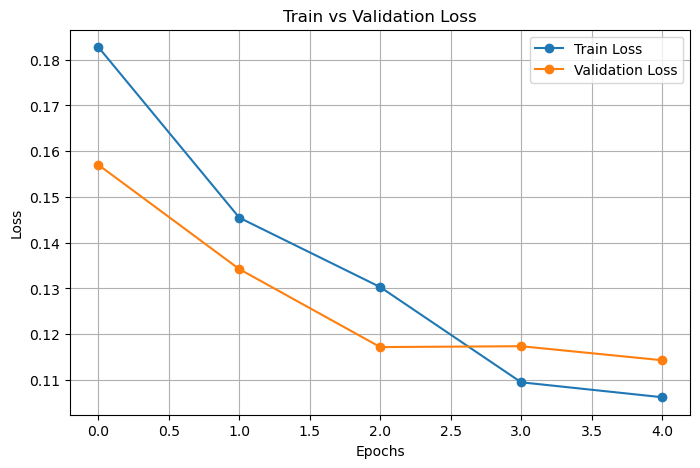

In [10]:
plot_dir = f"plots/{datafolder}/"
plot_losses(train_losses, val_losses, save_path=plot_dir)


In [19]:
save_dir = f"models/{datafolder}/"
model.load_state_dict(torch.load(os.path.join(save_dir, "best_model.pth")))

C:\Users\aryam\AppData\Local\Temp\ipykernel_19572\2700060476.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(save_dir, "bes

<All keys matched successfully>

Plot saved at: plots/aug_dataset/predictions_vs_ground_truth.png


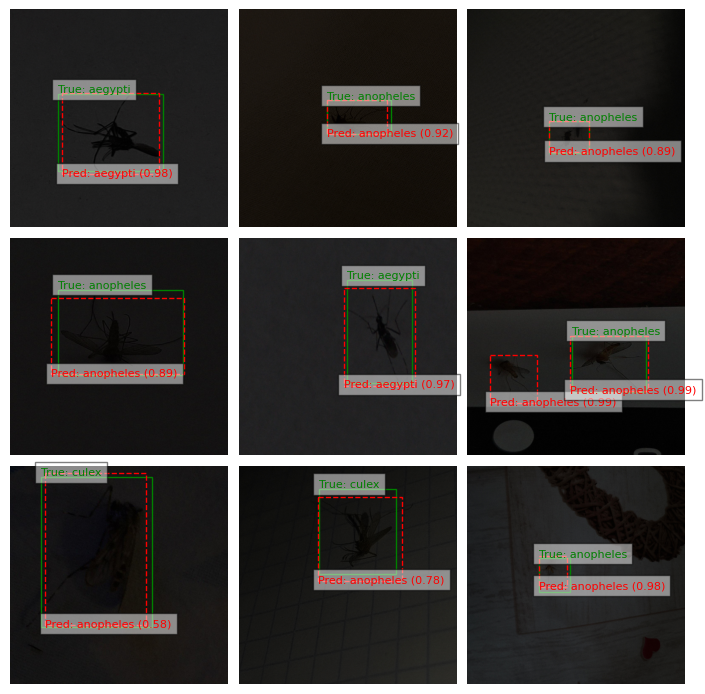

In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
plot_predictions(model, testloader, device, randomize=True, num_samples=9, grid_size=(3, 3), confidence_threshold=0.5, save_folder=plot_dir, dpi=200)

In [13]:
f1, map_score, mapf1, p, r = get_metrics(model, testloader, device, iou_threshold=0.5, score_threshold=0.5)
print(f"F1 Score: {f1:.4f}, mAP: {map_score:.4f}, Composite mAP-F1: {mapf1:.4f}, Precision: {p:.4f}, Recall: {r:.4f}")

Evaluating: 100%|██████████| 132/132 [00:47<00:00,  2.80it/s]

F1 Score: 0.8169, mAP: 0.8315, Composite mAP-F1: 0.8242, Precision: 0.7450, Recall: 0.9042


# Augmented and Illuminated Dataset

In [3]:
datafolder = "aug_il_dataset"
batch_size = 4
images_dir = f"../datasets/{datafolder}/images"
labels_dir = f"../datasets/{datafolder}/labels"

train_dataset = MosquitoDataset(f"{images_dir}/train", f"{labels_dir}/train")
val_dataset = MosquitoDataset(f"{images_dir}/val", f"{labels_dir}/val")
test_dataset = MosquitoDataset(f"{images_dir}/test", f"{labels_dir}/test")


trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

In [4]:
model = build_model(num_classes=7)  # 6 classes + 1 background
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [5]:
N_epochs = 5
save_dir = f"models/{datafolder}/"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_losses, val_losses, lr_history =  train(
    model=model,
    optimizer=optimizer,
    scheduler=scheduler,
    trainloader=trainloader,
    valloader=valloader,
    device=device,
    N_epochs=N_epochs,
    save_dir=save_dir,
    save_name="best_model.pth"
)

100%|██████████| 1652/1652 [16:01<00:00,  1.72it/s]


Epoch [1/5] | Train Loss: 0.1831 | Val Loss: 0.1460 | Time: 18 min 25 s
Best model saved with val loss: 0.1460


100%|██████████| 1652/1652 [17:40<00:00,  1.56it/s]


Epoch [2/5] | Train Loss: 0.1480 | Val Loss: 0.1421 | Time: 20 min 7 s
Best model saved with val loss: 0.1421


100%|██████████| 1652/1652 [20:22<00:00,  1.35it/s]


Epoch [3/5] | Train Loss: 0.1315 | Val Loss: 0.1322 | Time: 23 min 0 s
Best model saved with val loss: 0.1322


100%|██████████| 1652/1652 [20:32<00:00,  1.34it/s]


Epoch [4/5] | Train Loss: 0.1121 | Val Loss: 0.1228 | Time: 23 min 7 s
Best model saved with val loss: 0.1228


100%|██████████| 1652/1652 [20:22<00:00,  1.35it/s]


Epoch [5/5] | Train Loss: 0.1084 | Val Loss: 0.1209 | Time: 22 min 56 s
Best model saved with val loss: 0.1209


Loss plot saved to plots/aug_il_dataset/


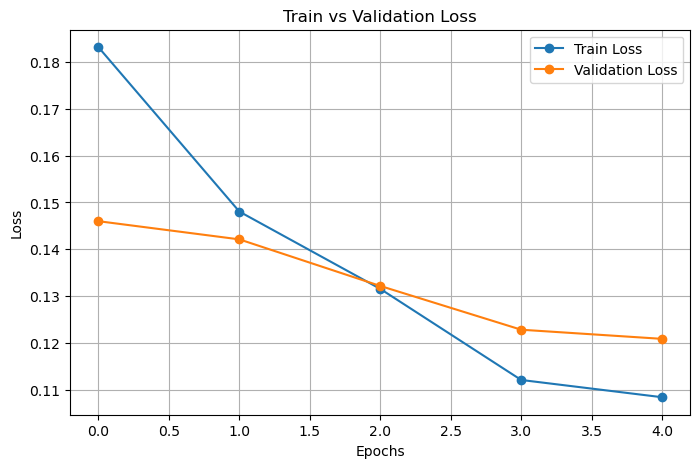

In [6]:
plot_dir = f"plots/{datafolder}/"
plot_losses(train_losses, val_losses, save_path=plot_dir)

In [7]:
save_dir = f"models/{datafolder}/"
model.load_state_dict(torch.load(os.path.join(save_dir, "best_model.pth")))

C:\Users\aryam\AppData\Local\Temp\ipykernel_63268\2700060476.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(save_dir, "bes

<All keys matched successfully>

Plot saved at: plots/aug_il_dataset/predictions_vs_ground_truth.png


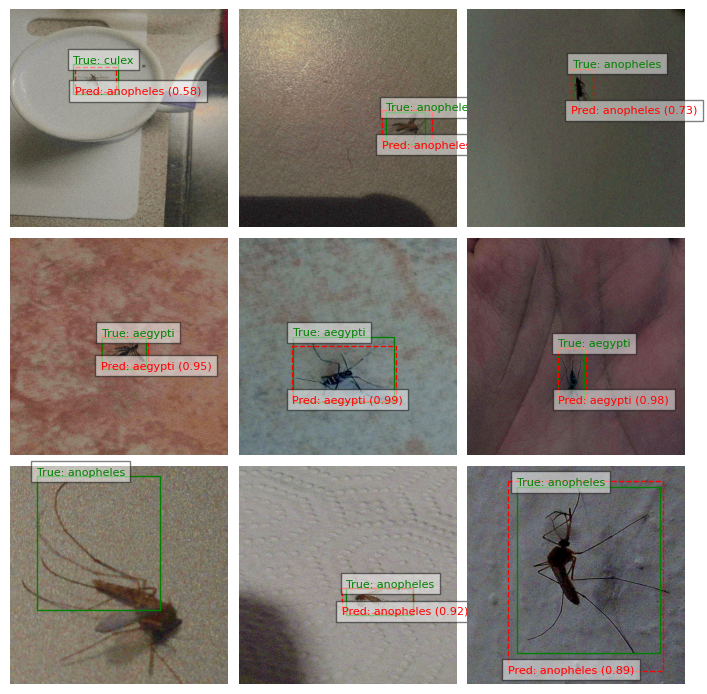

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
plot_predictions(model, testloader, device, randomize=True, num_samples=9, grid_size=(3, 3), confidence_threshold=0.5, save_folder=plot_dir, dpi=200)

In [9]:
f1, map_score, mapf1, p, r = get_metrics(model, testloader, device, iou_threshold=0.5, score_threshold=0.5)
print(f"F1 Score: {f1:.4f}, mAP: {map_score:.4f}, Composite mAP-F1: {mapf1:.4f}, Precision: {p:.4f}, Recall: {r:.4f}")

Evaluating: 100%|██████████| 132/132 [01:16<00:00,  1.74it/s]

F1 Score: 0.7873, mAP: 0.8073, Composite mAP-F1: 0.7973, Precision: 0.7213, Recall: 0.8665
